In [8]:
#Exploratory Data Analysis - Roller Coaster Analysis
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

df=pd.read_csv('coaster.csv')
df.shape
df.head()

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
0,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,39,12,63,1496,2.59,-0.27,1.71,0.00,2,19,0
1,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.50,Medium,37,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
2,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,31,11,70,1591,3.13,-1.70,2.15,1.44,11,22,0
3,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,47,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1
4,1,Forest Frontiers,Junior Roller Coaster,0,5.17,High,5.54,High,3.81,Medium,34,13,51,1279,2.38,-0.26,2.45,0.72,4,39,0


In [9]:
df.columns

Index(['park_id', 'theme', 'rollercoaster_type', 'custom_design', 'excitement',
       'excitement_rating', 'intensity', 'intensity_rating', 'nausea',
       'nausea_rating', 'max_speed', 'avg_speed', 'ride_time', 'ride_length',
       'max_pos_gs', 'max_neg_gs', 'max_lateral_gs', 'total_air_time', 'drops',
       'highest_drop_height', 'inversions'],
      dtype='object')

In [10]:
df.dtypes

park_id                  int64
theme                   object
rollercoaster_type      object
custom_design            int64
excitement             float64
excitement_rating       object
intensity              float64
intensity_rating        object
nausea                 float64
nausea_rating           object
max_speed                int64
avg_speed                int64
ride_time                int64
ride_length              int64
max_pos_gs             float64
max_neg_gs             float64
max_lateral_gs         float64
total_air_time         float64
drops                    int64
highest_drop_height      int64
inversions               int64
dtype: object

In [11]:
df.describe()

,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,21.740741,0.746032,6.495608,6.914603,4.430212,45.470899,14.296296,73.158730,2042.730159,3.423862,-1.318307,1.991952,1.979947,5.560847,57.359788,0.380952
std,11.328343,0.436436,1.157852,3.127408,1.446899,9.381708,4.693481,21.516352,814.490995,0.847993,4.053789,0.552003,1.759474,2.366151,30.056112,1.357743
min,0.000000,0.000000,2.460000,1.930000,1.330000,29.000000,1.000000,12.000000,620.000000,2.140000,-56.000000,0.000000,0.000000,1.000000,9.000000,-1.000000
25%,12.000000,0.000000,6.010000,5.660000,3.320000,39.000000,12.000000,60.000000,1561.000000,2.800000,-1.480000,1.650000,0.960000,4.000000,42.000000,0.000000
50%,21.000000,1.000000,6.610000,6.720000,4.270000,45.000000,14.000000,72.000000,1876.000000,3.240000,-1.070000,1.980000,1.620000,5.000000,52.000000,0.000000
75%,30.000000,1.000000,7.190000,7.750000,5.240000,50.000000,16.000000,84.000000,2385.000000,3.930000,-0.660000,2.420000,2.410000,6.000000,68.000000,1.000000
max,41.000000,1.000000,9.480000,44.940000,9.850000,89.000000,44.000000,186.000000,7497.000000,6.260000,1.890000,3.320000,13.680000,15.000000,239.000000,9.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   park_id              189 non-null    int64  
 1   theme                189 non-null    object 
 2   rollercoaster_type   189 non-null    object 
 3   custom_design        189 non-null    int64  
 4   excitement           189 non-null    float64
 5   excitement_rating    189 non-null    object 
 6   intensity            189 non-null    float64
 7   intensity_rating     189 non-null    object 
 8   nausea               189 non-null    float64
 9   nausea_rating        189 non-null    object 
 10  max_speed            189 non-null    int64  
 11  avg_speed            189 non-null    int64  
 12  ride_time            189 non-null    int64  
 13  ride_length          189 non-null    int64  
 14  max_pos_gs           189 non-null    float64
 15  max_neg_gs           189 non-null    flo

In [13]:
#Data Preparation 
#df.drop(['inversions'],axis=1)
df.isna().sum()

park_id                0
theme                  0
rollercoaster_type     0
custom_design          0
excitement             0
excitement_rating      0
intensity              0
intensity_rating       0
nausea                 0
nausea_rating          0
max_speed              0
avg_speed              0
ride_time              0
ride_length            0
max_pos_gs             0
max_neg_gs             0
max_lateral_gs         0
total_air_time         0
drops                  0
highest_drop_height    0
inversions             0
dtype: int64

In [15]:
df.loc[df.duplicated()]

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions


In [17]:
df.query('theme == "Barony Bridge"')

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
0,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,39,12,63,1496,2.59,-0.27,1.71,0.00,2,19,0
1,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.50,Medium,37,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
2,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,31,11,70,1591,3.13,-1.70,2.15,1.44,11,22,0
3,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,47,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1


In [18]:
# feature understanding 
df['intensity'].value_counts()

intensity
7.05    3
6.54    3
5.64    3
5.29    3
7.09    2
       ..
7.35    1
5.00    1
6.61    1
7.72    1
8.15    1
Name: count, Length: 155, dtype: int64

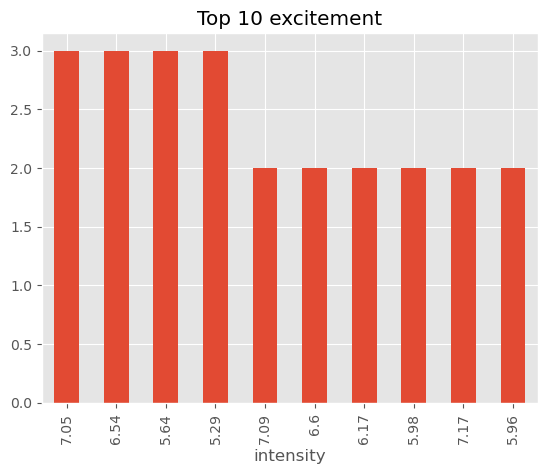

In [23]:
ax= df['intensity'].value_counts() \
    .head(10) \
    .plot(kind='bar', title = 'Top 10 excitement')
ax.set_xlabel = ('Intensity')
ax.set_ylabel = ('Count')

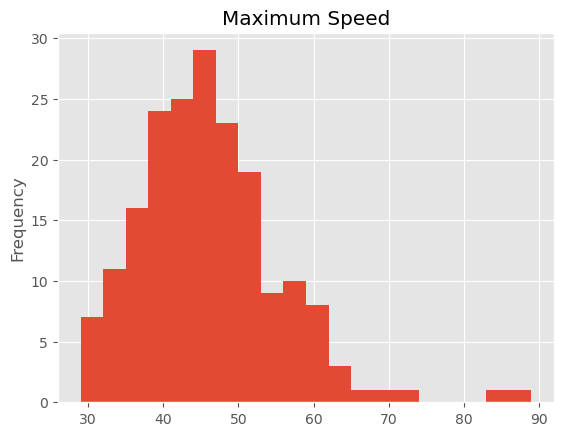

In [24]:
ax= df['max_speed'].plot(kind='hist', bins=20, title = 'Maximum Speed')
ax.set_xlabel = ('speed mph')

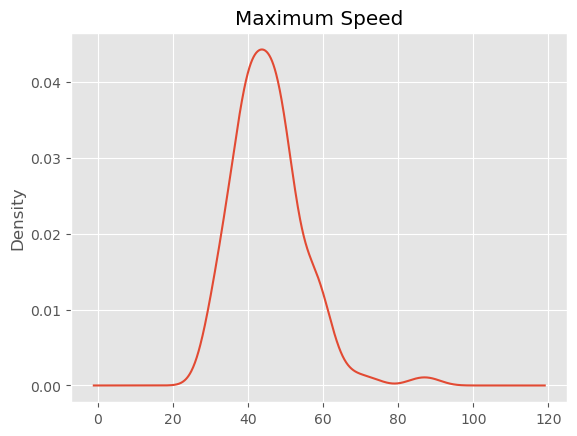

In [25]:
ax= df['max_speed'].plot(kind='kde', title = 'Maximum Speed')
ax.set_xlabel = ('speed mph')

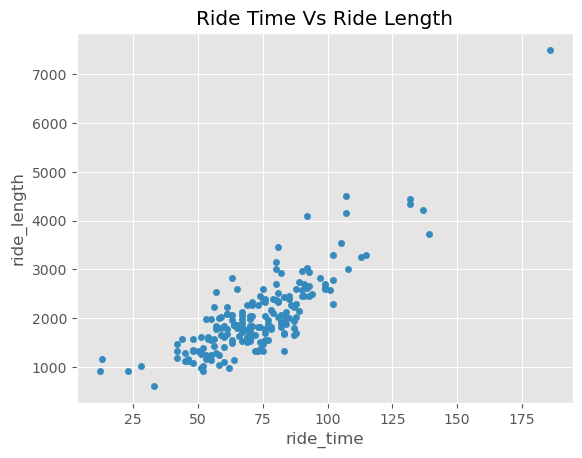

In [26]:
df.plot(kind='scatter', x='ride_time', y = 'ride_length', title = 'Ride Time Vs Ride Length')
plt.show()

Text(0.5, 1.0, 'Ride Time Vs Ride Length')

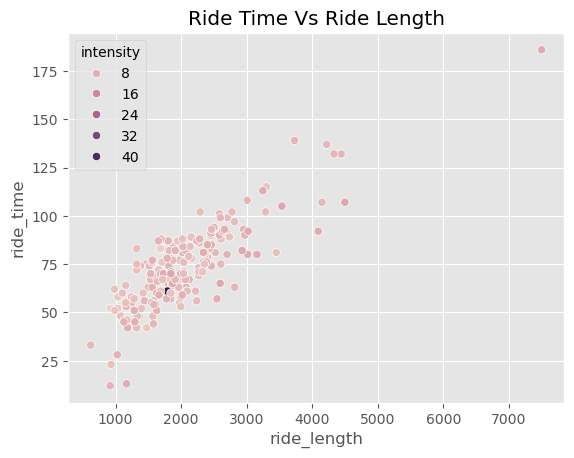

In [27]:
ax=sns.scatterplot(x='ride_length', y='ride_time', hue='intensity', data=df)
ax.set_title('Ride Time Vs Ride Length')

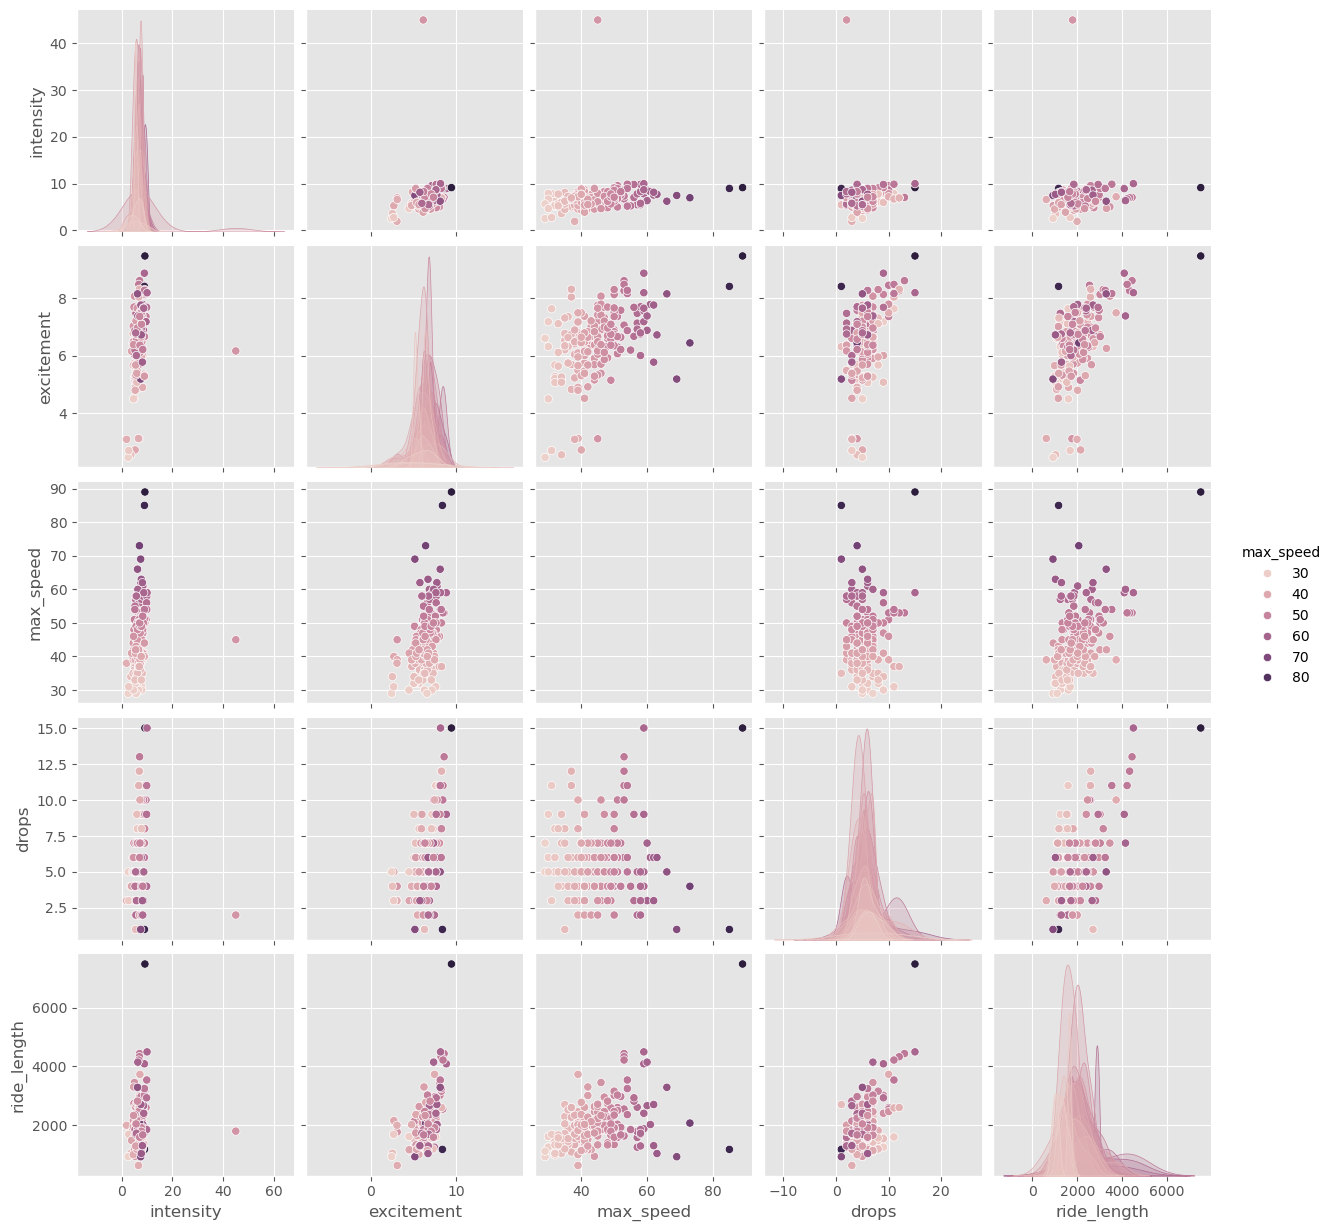

In [30]:
ax=sns.pairplot(df, vars=['intensity','excitement','max_speed','drops','ride_length'],hue='max_speed')
plt.show()

In [42]:
df_corr=df[['intensity','max_speed','ride_time', 'ride_length','excitement']].dropna().corr()
df_corr

,intensity,max_speed,ride_time,ride_length,excitement
intensity,1.000000,0.197105,0.015589,0.109194,0.235240
max_speed,0.197105,1.000000,0.131513,0.434851,0.477766
ride_time,0.015589,0.131513,1.000000,0.833730,0.355802
ride_length,0.109194,0.434851,0.833730,1.000000,0.565303
excitement,0.235240,0.477766,0.355802,0.565303,1.000000


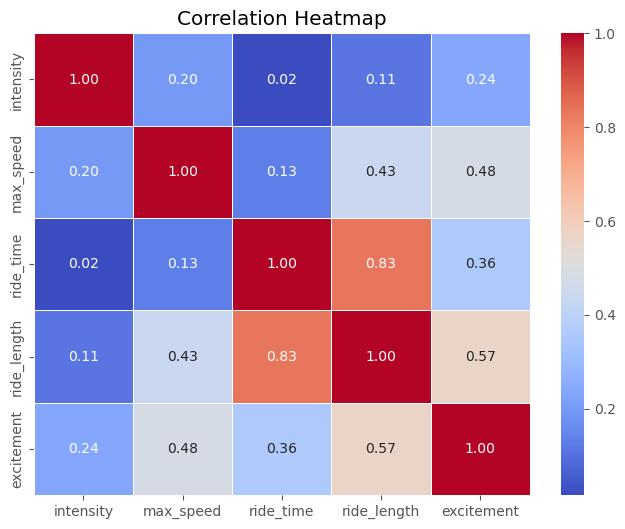

In [43]:
#sns.heatmap(df_corr, annot=True)
plt.figure(figsize=(8, 6))  # Optional: Adjust the size of the heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()